# Tutorial 4
## Naive Bayes and Support Vector Machine

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('iris.csv')

In [3]:
# looking at the dataset
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


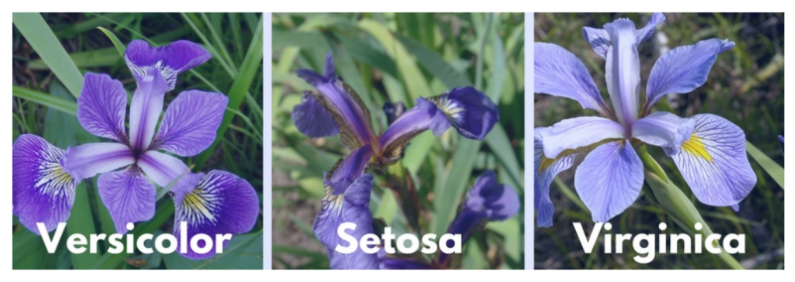

In [4]:
%matplotlib inline

# Load the image for three categories of the flowers
img=mpimg.imread('iris_types.png')
plt.figure(figsize=(14, 28))
plt.axis('off')
plt.imshow(img)

In [5]:
# Spliting the dataset into independent and dependent variables
X = dataset.iloc[:,:4].values
y = dataset['species'].values
# print(X, y)

In [6]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

# Display the rows and coulmns of X, y, X_train, y_train, X_test, y_test
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((150, 4), (150,), (120, 4), (120,), (30, 4), (30,))

In [7]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler

# Create and initialise an object sc by calling a method StandardScaler()
sc = StandardScaler()

# Train the model by calling a method fit_transform()
X_train = sc.fit_transform(X_train)

# Transforms the test data
X_test = sc.transform(X_test)

In [8]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB

# Create and initialise an object sc by calling a method GaussianNB()
nvclassifier = GaussianNB()

# Train the model by calling a method fit()
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [9]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)

# Display the predicted values
print(y_pred)

['virginica' 'virginica' 'setosa' 'setosa' 'setosa' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'versicolor' 'virginica' 'setosa' 'virginica' 'versicolor']


In [10]:
# Check the actual and predicted value side by side
y_compare = np.vstack((y_test, y_pred)).T
# actual value on the left side and predicted value on the right hand side
# printing the top 10 values
y_compare[:10, :]

array([['virginica', 'virginica'],
       ['virginica', 'virginica'],
       ['setosa', 'setosa'],
       ['setosa', 'setosa'],
       ['setosa', 'setosa'],
       ['versicolor', 'virginica'],
       ['versicolor', 'versicolor'],
       ['versicolor', 'versicolor'],
       ['virginica', 'versicolor'],
       ['versicolor', 'versicolor']], dtype=object)

A confusion matrix is a table that is used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.

In [11]:
# Construct the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  0  0]
 [ 0  8  1]
 [ 0  1  9]]


In [12]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.9333333333333333
Accuracy: 0.93


## K Fold Cross Validation
We essentially perform holdout cross-validation multiple times in k-fold cross-validation. Therefore, we divide the dataset into k equal-sized samples for k-fold cross-validation. The remaining k1 subsamples are utilized as training data, and just one subsample of these many k subsamples is used as validation data for testing the model. The cross-validation procedure is then carried out k times, using the validation data from each of the k subsamples exactly once each time. Then, an estimation can be created by averaging the k results.

A visual representation of 5-fold cross-validation (k=5) is provided in the following screenshot:

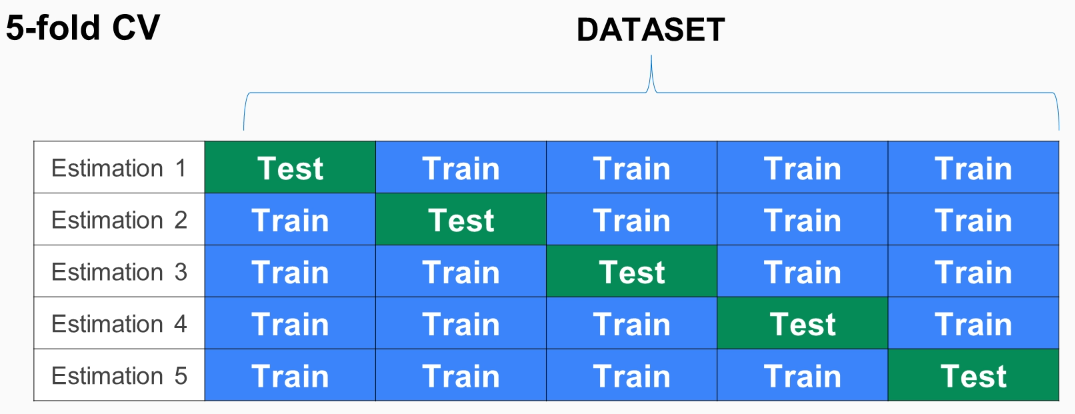

In [13]:
from IPython.display import Image
Image(filename =r'Image_CV.png', height = 800, width = 600)

## Use of Cross Validation

In [14]:
from sklearn.model_selection import cross_val_score
nvclassifier = GaussianNB()
cross_val_score(nvclassifier, X, y, scoring='accuracy', cv = 20).mean()

0.9598214285714286

## Naive Bayes with Multiple Labels
We have learned Naive Bayes classification with binary labels. we learn about multiple class classification in Naive Bayes. Which is known as multinomial Naive Bayes classification. For example, if we want to classify a news article about technology, entertainment, politics, or sports.

In model building part, we can use wine dataset which is a very famous multi-class classification problem. "This dataset is the result of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars." (UC Irvine)

Dataset comprises of 13 features (alcohol, malic_acid, ash, alcalinity_of_ash, magnesium, total_phenols, flavanoids, nonflavanoid_phenols, proanthocyanins, color_intensity, hue, od280/od315_of_diluted_wines, proline) and type of wine cultivar. This data has three type of wine Class_0, Class_1, and Class_3. Here you can build a model to classify the type of wine.

## Loading Data
Let's first load the required wine dataset from scikit-learn datasets.

In [15]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

## Exploring Data
You can print the target and feature names, to make sure you have the right dataset, as such:

In [16]:
# print the names of the 13 features
print("Features: ", wine.feature_names)

# print the label type of wine(class_0, class_1, class_2)
print("Labels: ", wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


It's always a good idea to always explore dat first, so you know what you're working with. Here, we can see the first five rows of the dataset are printed, as well as the target variable for the whole dataset.

In [17]:
# print data(feature)shape
wine.data.shape

(178, 13)

In [18]:
# print the wine data features (top 5 records)
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [19]:
# print the wine labels (0:Class_0, 1:class_2, 2:class_2)
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


## Splitting Data
First, we separate the columns into dependent and independent variables(or features and label). Then we split those variables into train and test set.

In [20]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3,random_state=109) # 70% training and 30% test

## Model Generation
After splitting, you will generate a random forest model on the training set and perform prediction on test set features.

In [21]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

## Evaluating Model
After model generation, check the accuracy using actual and predicted values.

In [22]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9074074074074074


## Use of Cross Validation

In [23]:
from sklearn.model_selection import cross_val_score
gnb = GaussianNB()
cross_val_score(gnb, wine.data, wine.target, scoring='accuracy', cv=30).mean()

0.9722222222222222

## Conclusion

In the first part of the tutorial, we learned about Naïve Bayes algorithm with three different examples, it's working, Naive Bayes assumption, issues, implementation, advantages, and disadvantages. Along the road, you have also learned model building and evaluation in scikit-learn for binary and multinomial classes.

Naive Bayes is the most straightforward and most potent algorithm. In spite of the significant advances of Machine Learning in the last couple of years, it has proved its worth. It has been successfully deployed in many applications from text analytics to recommendation engines.

# Task 1
### Apply Gaussian Naive Bayes (GNB) classifier algorithm on the following dataset cancer_data.csv

# Support Vector Machines

In [24]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [25]:
# Load the dataset
titanic = pd.read_csv('dataset.csv')
dataset = titanic.copy()

# Create independent and dependent variables
X = np.asarray(dataset.drop('Survived', 1))
y = np.asarray(dataset['Survived'])

# Replace 0 value in the target variable with -1
y[y == 0] = -1

C:\Users\miqba\AppData\Local\Temp\ipykernel_7980\4251408166.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.asarray(dataset.drop('Survived', 1))


In [26]:
# Display the number of rows and columns
X.shape

(891, 9)

In [27]:
# Display first 20 values
y[0:20]

array([-1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1,  1, -1,
        1, -1,  1], dtype=int64)

In [28]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [29]:
# Create an object sc by calling a method StandardScaler
sc = StandardScaler()

# Normalize the data by calling a fit_transform() method
X_train_normalized = sc.fit_transform(X_train)
X_test_normalized = sc.transform(X_test)

In [30]:
# Create an object svmModel by calling a method SVC()
svmModel = SVC(kernel = 'rbf',C = 2, gamma = 0.9)

# Train the model by calling a method fit()
svmModel.fit(X_train_normalized,y_train)

# Store the predicted values into y_pred
Y_pred = svmModel.predict(X_test_normalized)

# Display the accuracy upto 2 decimal places
print('Accuracy in SVC = ', round(accuracy_score(y_test, Y_pred)*100,2))

Accuracy in SVC =  80.45


# Task 2
### Use Breast Cancer dataset for the Classification of diagnosis applying a machine elarning model, Support Vector Machine (SVM)

## Step 1: Exploring the Dataset
### First, let’s understand our dataset:

In [31]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()

# Read the DataFrame, first using the feature data
df_cancer = pd.DataFrame(data.data, columns=data.feature_names)

# Add a target column, and fill it with the target data
df_cancer['diagnosis'] = data.target

# Show the first five rows
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [32]:
#get some information about our Data-Set
df_cancer.info()
df_cancer.describe()

#visualizing data
#sns.pairplot(df_cancer, hue = 'diagnosis')
#plt.figure(figsize = (7,7))
#sns.heatmap(df_cancer['mean_radius mean_texture mean_perimeter mean_area mean_smoothness diagnosis'.split()].corr(), annot=True)
#sns.scatterplot(x = 'mean_texture', y = 'mean_perimeter', hue = 'diagnosis', data = df_cancer)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


# Step 2: Handling of Missing/ Categorical Data
Before applying any method, we need to check if any values are missing and then deal with them if so. In this dataset, there are no missing values — but always keep the habit of checking for null values in a dataset!
Since machine learning models are based on mathematical equations, we need to encode the categorical variables. Here I used label encoding since we have two distinct values in the “diagnosis” column:

In [33]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [34]:
#check how many values are missing (NaN)
# here we do not have any missing values


In [35]:
#handling categorical data





In [36]:
# visualizing diagnosis column >>> 'benign':0,'malignant':1
# Display the frquency count for the target variable (diagnosis)



In [37]:
# Find the correlation between features



## Step 3: Splitting the Data-Set into Training Set and Test Set
Data is divided into the Train set and Test set. We use the Train set to make the algorithm learn the data’s behavior and then check the accuracy of our model on the Test set.
Features (X): The columns that are inserted into our model will be used to make predictions.
Prediction (y): Target variable that will be predicted by the features.

In [38]:
# define X variables and our target(y)


# split Train and Test
from sklearn.model_selection import train_test_split


## Step 4: Data Modeling-Support Vector Machine
Support Vector Machine (SVM) is one of the most useful supervised ML algorithms. It can be used for both classification and regression tasks.
There are a couple of concepts we first need to understand:
### What is the SVM Job? 
SVM chooses the hyperplane that does maximum separation between classes.
### What are hard and soft margins? 
If data can be linearly separable, SVM might return maximum accuracy (Hard Margin). When data is not linearly separable, all we need do is relax the margin to allow misclassifications (Soft Margin).
### What is Hyper-parameter C? 
The number of misclassifications errors can be controlled using the C parameter, which has a direct effect on the hyperplane.
### What is Hyper-parameter gamma? 
Gamma is used to give weightage to points close to support vector. In other words, changing the value of gamma would change the shape of the hyperplane.
### What is Kernel Trick? 
if our data is not linearly separable, we could apply a “Kernel Trick” method which maps the nonlinear data to higher dimensional space.

In [39]:
# Support Vector Classification model
# Create an object by calling SCV() and train the model
from sklearn.svm import SVC



## Step 5: Model Evaluation

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
# Display the predicted results using classification report and confusion matrix






### What does the confusion_matrix information result mean?
We had 143 women in our test set.
Out of 49 women predicted to not have breast cancer, 2 were classified as not having when actually they had (type one error).
Out of 86 women predicted to have breast cancer, 6 were classified as having breast cancer whey they did not (type two error).

In [41]:
pip install mlxtend

# Comparison of Machine Learning Models

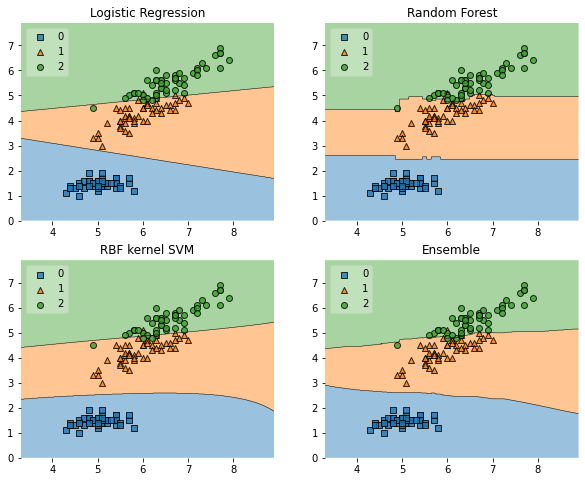

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers
clf1 = LogisticRegression(random_state=0)
clf2 = RandomForestClassifier(random_state=0)
clf3 = SVC(random_state=0, probability=True)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[2, 1, 1], voting='soft')

# Loading some example data
X, y = iris_data()
X = X[:,[0, 2]]

# Plotting Decision Regions
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         ['Logistic Regression', 'Random Forest', 'RBF kernel SVM', 'Ensemble'],
                         itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
plt.show()

## References: 
1. <p>https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn</p>
2. <p>https://towardsdatascience.com/case-study-breast-cancer-classification-svm-2b67d668bbb7</p>
3. <p>https://www.analyticsvidhya.com/blog/2021/11/implementation-of-gaussian-naive-bayes-in-python-sklearn/</p>